In [80]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB

#from lazypredict.Supervised import LazyClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

pd.set_option('display.max_columns', None)

In [81]:
#21BAI1778
df = pd.read_csv('data.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


<Axes: >

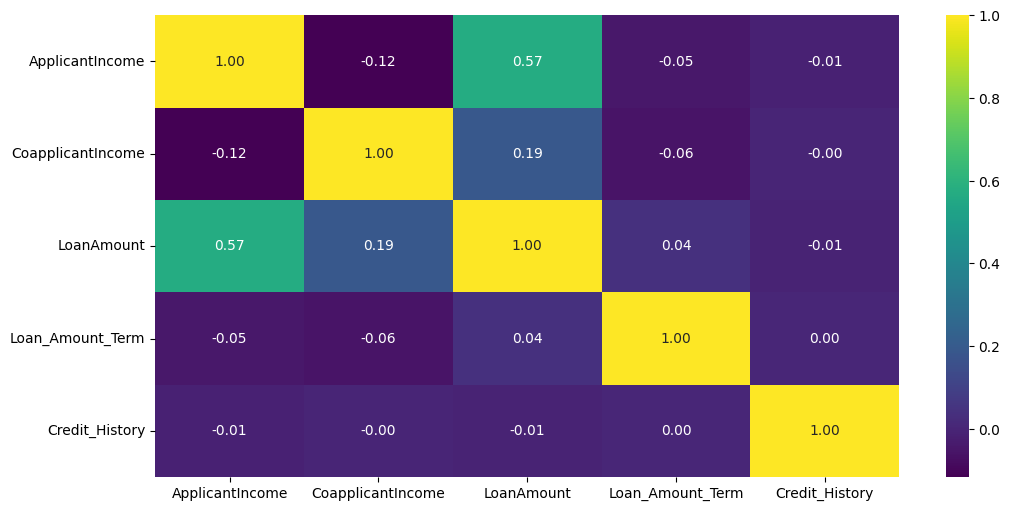

In [82]:
plt.figure(figsize = (12,6))
sns.heatmap(df.corr(), cmap='viridis', annot=True, fmt='.2f')

In [68]:
#21BAI1778
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [69]:
#21BAI1778
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [70]:
#21BAI1778
#  numericals with mean
numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())

#  categorical mode
categorical_columns = df.select_dtypes(include='object').columns.tolist()
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])


In [71]:
#21BAI1778
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [72]:
#21BAI1778
df['Dependents'] = df['Dependents'].str.replace('+', '').astype(float)

# Count the number of persons with more than 2 dependents
count = df[df['Dependents'].gt(2)]['Loan_ID'].count()
count


<ipython-input-72-746f659b90a6>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Dependents'] = df['Dependents'].str.replace('+', '').astype(float)


51

In [73]:
#21BAI1778
person_with_max_loan_amount = df.loc[df['LoanAmount'].idxmax()]
person_with_max_loan_amount


Loan_ID              LP001585
Gender                   Male
Married                   Yes
Dependents                3.0
Education            Graduate
Self_Employed              No
ApplicantIncome         51763
CoapplicantIncome         0.0
LoanAmount              700.0
Loan_Amount_Term        300.0
Credit_History            1.0
Property_Area           Urban
Loan_Status                 Y
Name: 171, dtype: object

In [74]:
#21BAI1778
df['Dependents'] = df['Dependents'].astype(int)

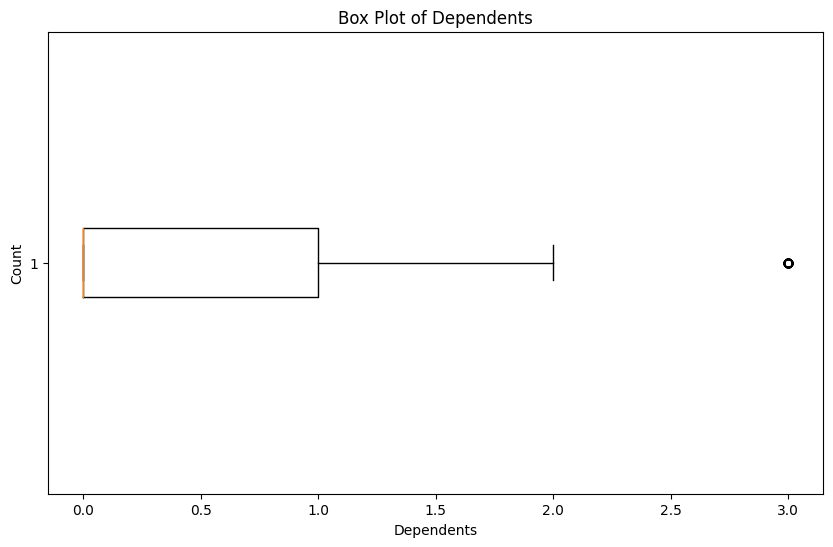

In [75]:
#21BAI1778
plt.figure(figsize=(10, 6))
plt.boxplot(df['Dependents'], vert=False)
plt.xlabel('Dependents')
plt.ylabel('Count')
plt.title('Box Plot of Dependents')
plt.show()

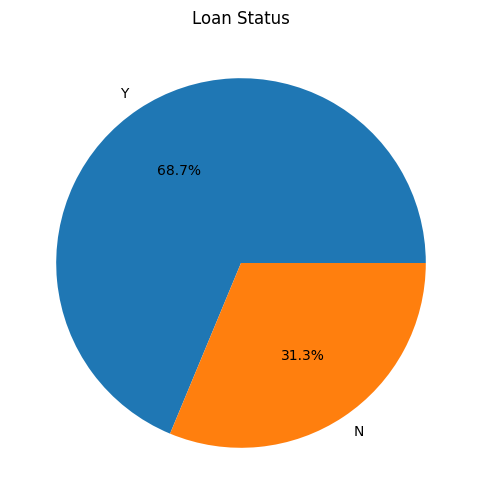

In [76]:
#21BAI1778
loan_status_counts = df['Loan_Status'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(loan_status_counts, labels=loan_status_counts.index, autopct='%1.1f%%')
plt.title('Loan Status')
plt.show()

In [77]:
#21BAI1778
x =df['LoanAmount'].max()
x


700.0

In [78]:
#21BAI1778
df['fam_inc'] = df['ApplicantIncome']+df['CoapplicantIncome']
max = df['fam_inc'].max()
max

81000.0

In [79]:
#21BAI1778
df['fam_inc'] = (df['fam_inc'])/max
df['fam_inc']

0      0.072210
1      0.075198
2      0.037037
3      0.061000
4      0.074074
         ...   
609    0.035802
610    0.050691
611    0.102617
612    0.093617
613    0.056580
Name: fam_inc, Length: 614, dtype: float64